In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [56]:
le = pd.read_csv('DataSet.csv', sep=',')
le.dataframeName = 'DataSet.csv'
le.head()

,Variable,row,age,sex,b1,b2,b3,b4,b5,b6,...,m55,m56,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti
0,NaN,1,NaN,1,1,1,1,1,1,1,...,1,5,168,15,28,16,42,22,48,170
1,NaN,2,NaN,1,3,1,2,1,2,1,...,5,5,170,18,26,17,43,21,47,171
2,NaN,3,NaN,1,3,4,4,1,1,1,...,1,1,135,15,31,18,34,27,42,171
3,NaN,4,NaN,1,2,5,2,2,2,2,...,1,1,155,24,29,20,45,25,53,193
4,NaN,5,NaN,1,1,1,2,1,1,1,...,1,1,152,24,25,12,40,22,38,159


In [57]:
# Modify the original names of the features using a standard format for all the features.
orig_cols = list(le.columns) 
new_cols = [] 
for col in orig_cols:     
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower()) 

le.columns = new_cols
# Discard the metadata (age and variable and row).
le.drop(['age', 'variable', 'row'], axis=1, inplace=True)

In [58]:
le.head()

,sex,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,m55,m56,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti
0,1,1,1,1,1,1,1,1,1,1,...,1,5,168,15,28,16,42,22,48,170
1,1,3,1,2,1,2,1,1,1,1,...,5,5,170,18,26,17,43,21,47,171
2,1,3,4,4,1,1,1,1,1,1,...,1,1,135,15,31,18,34,27,42,171
3,1,2,5,2,2,2,2,1,2,2,...,1,1,155,24,29,20,45,25,53,193
4,1,1,1,2,1,1,1,1,1,1,...,1,1,152,24,25,12,40,22,38,159


In [59]:
le.drop(le.iloc[:,1:134], axis = 1, inplace = True)
le.head(150)

,sex,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti
0,1,168,15,28,16,42,22,48,170
1,1,170,18,26,17,43,21,47,171
2,1,135,15,31,18,34,27,42,171
3,1,155,24,29,20,45,25,53,193
4,1,152,24,25,12,40,22,38,159
...,...,...,...,...,...,...,...,...,...
145,2,153,18,26,21,45,28,49,194
146,2,146,19,23,16,45,26,47,179
147,2,127,27,30,22,48,37,55,221
148,2,139,22,34,20,46,30,58,212


In [60]:
kmeans=KMeans(n_clusters=3)

In [61]:
kmeans.fit(le)

KMeans(n_clusters=3)

In [62]:
kmeans.labels_

array([0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0,
       2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 1, 0])

In [63]:
le['Label']=kmeans.labels_

In [64]:
le

,sex,maharat,roshd,khodpeiravi,ertebatm,rezayat,manaviat,shadi,behzisti,Label
0,1,168,15,28,16,42,22,48,170,0
1,1,170,18,26,17,43,21,47,171,0
2,1,135,15,31,18,34,27,42,171,0
3,1,155,24,29,20,45,25,53,193,1
4,1,152,24,25,12,40,22,38,159,0
...,...,...,...,...,...,...,...,...,...,...
155,2,178,23,32,25,65,28,60,231,2
156,2,126,23,23,18,40,25,57,192,1
157,2,171,18,18,14,41,22,40,153,0
158,2,107,26,36,34,58,30,46,228,1


In [65]:
le.Label.value_counts()

0    67
1    57
2    36
Name: Label, dtype: int64

In [66]:
#split dataset in features and target variable
feature_cols = ['sex', 'maharat', 'roshd', 'khodpeiravi','ertebatm','rezayat','manaviat','shadi','behzisti']
X = le[feature_cols] # Features
y = le.Label # Target variable

In [67]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [68]:
# Create Decision Tree classifer object
le = DecisionTreeClassifier()

# Train Decision Tree Classifer
le = le.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = le.predict(X_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


# Visualizing Decision Trees

In [70]:
# Create Decision Tree classifer object
le = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
le = le.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = le.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [71]:
from sklearn import tree
le = tree.DecisionTreeClassifier()
le = le.fit(X, y)

[Text(139.5, 199.32, 'X[8] <= 180.5\ngini = 0.647\nsamples = 160\nvalue = [67, 57, 36]'),
 Text(63.77142857142857, 163.07999999999998, 'X[1] <= 125.5\ngini = 0.082\nsamples = 70\nvalue = [67, 3, 0]'),
 Text(31.885714285714286, 126.83999999999999, 'X[2] <= 15.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(15.942857142857143, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(47.82857142857143, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(95.65714285714286, 126.83999999999999, 'X[8] <= 178.5\ngini = 0.029\nsamples = 67\nvalue = [66, 1, 0]'),
 Text(79.71428571428572, 90.6, 'gini = 0.0\nsamples = 63\nvalue = [63, 0, 0]'),
 Text(111.6, 90.6, 'X[1] <= 153.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(95.65714285714286, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(127.54285714285714, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(215.22857142857143, 163.07999999999998, 'X[1] <= 153.5\ngini = 0.48\

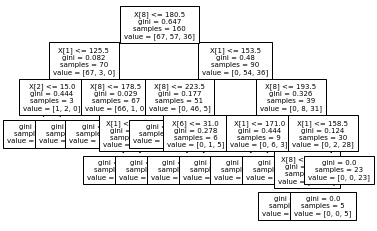

In [72]:
tree.plot_tree(le, fontsize=7)